# 0 Function to Calculate Metrics

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_classification_performance(label, prediction):
    """
    Calculate precision, recall, F1 score, and accuracy for the given label and prediction lists.

    Args:
    label (list): The list containing the true binary labels (0s and 1s).
    prediction (list): The list containing the predicted binary labels (0s and 1s).

    Returns:
    tuple: A tuple containing the precision, recall, F1 score, and accuracy.
    """
    precision = precision_score(label, prediction)
    recall = recall_score(label, prediction)
    f1 = f1_score(label, prediction)
    accuracy = accuracy_score(label, prediction)

    return precision, recall, f1, accuracy

def calc(nlabel,label,na,a,nb,b,nc,c,nd,d):
    t=[]
    t.append([nlabel,'precision','recall', 'f1', 'accuracy'])
    precision, recall, f1, accuracy = evaluate_classification_performance(label, a)
    t.append([na,"{:.2f}".format(precision*100),"{:.2f}".format(recall*100),"{:.2f}".format(f1*100), "{:.2f}".format(accuracy*100)])
    precision, recall, f1, accuracy = evaluate_classification_performance(label, b)
    t.append([nb,"{:.2f}".format(precision*100),"{:.2f}".format(recall*100),"{:.2f}".format(f1*100), "{:.2f}".format(accuracy*100)])
    precision, recall, f1, accuracy = evaluate_classification_performance(label, c)
    t.append([nc,"{:.2f}".format(precision*100),"{:.2f}".format(recall*100),"{:.2f}".format(f1*100), "{:.2f}".format(accuracy*100)])
    precision, recall, f1, accuracy = evaluate_classification_performance(label, d)
    t.append([nd,"{:.2f}".format(precision*100),"{:.2f}".format(recall*100),"{:.2f}".format(f1*100), "{:.2f}".format(accuracy*100)])
    return t
    
def kappa(human,GPT4,GPT3,Gemini,Claude):
    t=[]
    t.append(['Kappa','GPT3.5','Gemini','Claude'])
    a = cohen_kappa_score(human, GPT3)
    b = cohen_kappa_score(human, Gemini)
    c = cohen_kappa_score(human, Claude)
    t.append(['Human',a,b,c])
    a = cohen_kappa_score(GPT4, GPT3)
    b = cohen_kappa_score(GPT4, Gemini)
    c = cohen_kappa_score(GPT4, Claude)
    t.append(['GPT4',a,b,c])
    return t


def F1(Human,GPT4,GPT3,Gemini,Claude):
    t=[]
    t.append(['F1','GPT3.5','Gemini','Claude'])
    a = f1_score(Human, GPT3)
    b = f1_score(Human, Gemini)
    c = f1_score(Human, Claude)
    t.append(['Human',a,b,c])
    a = f1_score(GPT4, GPT3)
    b = f1_score(GPT4, Gemini)
    c = f1_score(GPT4, Claude)
    t.append(['GPT4',a,b,c])
    return t

def ACC(Human,GPT4,GPT3,Gemini,Claude):
    t=[]
    t.append(['ACC','GPT3.5','Gemini','Claude'])
    a = accuracy_score(Human, GPT3)
    b = accuracy_score(Human, Gemini)
    c = accuracy_score(Human, Claude)
    t.append(['Human',a,b,c])
    a = accuracy_score(GPT4, GPT3)
    b = accuracy_score(GPT4, Gemini)
    c = accuracy_score(GPT4, Claude)
    t.append(['GPT4',a,b,c])
    return t

def print_latex_table(data):
  """
  This function takes a list of lists as input and prints it in a LaTeX table format.

  Args:
      data: A list of lists containing the data for the table.
  """
  for row in data:
    # Escape ampersands for proper LaTeX formatting
    row_str = " & ".join([str(x).replace('&', '\\&') for x in row])
    print(row_str + " \\\\")

#  1 Hyperboles

In [5]:
import json
with open('hyperboles/labelH.json', 'r') as file:
    labelH = json.load(file)
with open('hyperboles/GPT4H.json', 'r') as file:
    GPT4H = json.load(file)
with open('hyperboles/GPT3H.json', 'r') as file:
    GPT3H = json.load(file) 
with open('hyperboles/GeminiH.json', 'r') as file:
    GeminiH = json.load(file)  
with open('hyperboles/ClaudeH.json', 'r') as file:
    ClaudeH = json.load(file)   

## 1.1 precision, recall, f1, accuracy

In [19]:
import texttable
table = texttable.Texttable()
t=calc('Human',labelH,'Gemini',GeminiH,'Claude',ClaudeH,'GPT3.5',GPT3H,'GPT4',GPT4H)
table.add_rows(t)
print("      TABEL1 Human label considered as golden")
print(table.draw(),end='\n\n')
print_latex_table(t)

      TABEL1 Human label considered as golden
+--------+-----------+--------+--------+----------+
| Human  | precision | recall |   f1   | accuracy |
+========+===========+========+========+==========+
| Gemini | 83.390    | 72.920 | 77.800 | 79.200   |
+--------+-----------+--------+--------+----------+
| Claude | 88.260    | 77.430 | 82.490 | 83.570   |
+--------+-----------+--------+--------+----------+
| GPT3.5 | 84.270    | 50.630 | 63.260 | 70.590   |
+--------+-----------+--------+--------+----------+
| GPT4   | 89.070    | 82.790 | 85.820 | 86.320   |
+--------+-----------+--------+--------+----------+

Human & precision & recall & f1 & accuracy \\
Gemini & 83.39 & 72.92 & 77.80 & 79.20 \\
Claude & 88.26 & 77.43 & 82.49 & 83.57 \\
GPT3.5 & 84.27 & 50.63 & 63.26 & 70.59 \\
GPT4 & 89.07 & 82.79 & 85.82 & 86.32 \\


## 1.2 Who is golden?
Compare F1,ACC,Kappa

In [31]:
from sklearn.metrics import cohen_kappa_score
import texttable

table = texttable.Texttable()
t=F1(labelH,GPT4H,GPT3H,GeminiH,ClaudeH)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw(),end='\n\n')
####--------------------------------------------------------------------------
table = texttable.Texttable()
t=ACC(labelH,GPT4H,GPT3H,GeminiH,ClaudeH)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw(),end='\n\n')
####--------------------------------------------------------------------------
table = texttable.Texttable()
t=kappa(labelH,GPT4H,GPT3H,GeminiH,ClaudeH)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw())

# cohen_kappa_score(GeminiInferH,labelH)

+--------+-------+-------+
|   F1   | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.633 | 0.654 |
+--------+-------+-------+
| Gemini | 0.778 | 0.807 |
+--------+-------+-------+
| Claude | 0.825 | 0.842 |
+--------+-------+-------+

+--------+-------+-------+
|  ACC   | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.706 | 0.736 |
+--------+-------+-------+
| Gemini | 0.792 | 0.826 |
+--------+-------+-------+
| Claude | 0.836 | 0.857 |
+--------+-------+-------+

+--------+-------+-------+
| Kappa  | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.412 | 0.456 |
+--------+-------+-------+
| Gemini | 0.584 | 0.649 |
+--------+-------+-------+
| Claude | 0.671 | 0.711 |
+--------+-------+-------+


# 2 Metaphors 

In [21]:
import json
with open('Metaphors/labelM.json', 'r') as file:
    labelM = json.load(file)
with open('Metaphors/GPT4M.json', 'r') as file:
    GPT4M = json.load(file)
with open('Metaphors/GPT3M.json', 'r') as file:
    GPT3M = json.load(file)
with open('Metaphors/GeminiM.json', 'r') as file:
    GeminiM = json.load(file)  
with open('Metaphors/ClaudeM.json', 'r') as file:
    ClaudeM = json.load(file)   

## 2.1 precision, recall, f1, accuracy

In [22]:
import texttable
table = texttable.Texttable()
t=calc('Human',labelM,'Gemini',GeminiM,'Claude',ClaudeM,'GPT3.5',GPT3M,'GPT4',GPT4M)
table.add_rows(t)
print("      TABEL1 Human label considered as golden")
print(table.draw(),end='\n\n')
print_latex_table(t)
#######################################################################

      TABEL1 Human label considered as golden
+--------+-----------+--------+--------+----------+
| Human  | precision | recall |   f1   | accuracy |
+========+===========+========+========+==========+
| Gemini | 69.210    | 78.780 | 73.680 | 75.320   |
+--------+-----------+--------+--------+----------+
| Claude | 69.110    | 83.440 | 75.600 | 76.380   |
+--------+-----------+--------+--------+----------+
| GPT3.5 | 65.350    | 61.250 | 63.240 | 68.760   |
+--------+-----------+--------+--------+----------+
| GPT4   | 75.620    | 78.780 | 77.170 | 79.550   |
+--------+-----------+--------+--------+----------+

Human & precision & recall & f1 & accuracy \\
Gemini & 69.21 & 78.78 & 73.68 & 75.32 \\
Claude & 69.11 & 83.44 & 75.60 & 76.38 \\
GPT3.5 & 65.35 & 61.25 & 63.24 & 68.76 \\
GPT4 & 75.62 & 78.78 & 77.17 & 79.55 \\


## 2.2 Who is golden?
Compare F1,ACC,Kappa

In [208]:
from sklearn.metrics import cohen_kappa_score
import texttable

table = texttable.Texttable()
t=F1(labelM,GPT4M,GPT3M,GeminiM,ClaudeM)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw(),end='\n\n')
####--------------------------------------------------------------------------
table = texttable.Texttable()
t=ACC(labelM,GPT4M,GPT3M,GeminiM,ClaudeM)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw(),end='\n\n')
####--------------------------------------------------------------------------
table = texttable.Texttable()
t=kappa(labelM,GPT4M,GPT3M,GeminiM,ClaudeM)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw())

# cohen_kappa_score(GeminiInferH,labelH)

+--------+-------+-------+
|   F1   | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.632 | 0.734 |
+--------+-------+-------+
| Gemini | 0.737 | 0.839 |
+--------+-------+-------+
| Claude | 0.756 | 0.856 |
+--------+-------+-------+

+--------+-------+-------+
|  ACC   | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.688 | 0.769 |
+--------+-------+-------+
| Gemini | 0.753 | 0.846 |
+--------+-------+-------+
| Claude | 0.764 | 0.858 |
+--------+-------+-------+

+--------+-------+-------+
| Kappa  | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.361 | 0.532 |
+--------+-------+-------+
| Gemini | 0.506 | 0.692 |
+--------+-------+-------+
| Claude | 0.531 | 0.718 |
+--------+-------+-------+


# 3 Puns

In [23]:
import json
with open('Puns/labelP.json', 'r') as file:
    labelP = json.load(file)
with open('Puns/GPT4P.json', 'r') as file:
    GPT4P = json.load(file)
with open('Puns/GPT3P.json', 'r') as file:
    GPT3P = json.load(file)
with open('Puns/GeminiP.json', 'r') as file:
    GeminiP = json.load(file)   
with open('Puns/ClaudeP.json', 'r') as file:
    ClaudeP = json.load(file)   


## 3.1 precision, recall, f1, accuracy

In [24]:
import texttable
table = texttable.Texttable()
t=calc('Human',labelP,'Gemini',GeminiP,'Claude',ClaudeP,'GPT3.5',GPT3P,'GPT4',GPT4P)
table.add_rows(t)
print("      TABEL1 Human label considered as golden")
print(table.draw(),end='\n\n')
print_latex_table(t)
#######################################################################

      TABEL1 Human label considered as golden
+--------+-----------+--------+--------+----------+
| Human  | precision | recall |   f1   | accuracy |
+========+===========+========+========+==========+
| Gemini | 85.070    | 93.220 | 88.950 | 83.470   |
+--------+-----------+--------+--------+----------+
| Claude | 93.760    | 86.930 | 90.220 | 86.530   |
+--------+-----------+--------+--------+----------+
| GPT3.5 | 83.690    | 84.010 | 83.850 | 76.890   |
+--------+-----------+--------+--------+----------+
| GPT4   | 93.850    | 94.030 | 93.940 | 91.330   |
+--------+-----------+--------+--------+----------+

Human & precision & recall & f1 & accuracy \\
Gemini & 85.07 & 93.22 & 88.95 & 83.47 \\
Claude & 93.76 & 86.93 & 90.22 & 86.53 \\
GPT3.5 & 83.69 & 84.01 & 83.85 & 76.89 \\
GPT4 & 93.85 & 94.03 & 93.94 & 91.33 \\


## 3.2 Who is golden?
Compare F1,ACC,Kappa

In [32]:
from sklearn.metrics import cohen_kappa_score
import texttable

table = texttable.Texttable()
t=F1(labelP,GPT4P,GPT3P,GeminiP,ClaudeP)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw(),end='\n\n')
####--------------------------------------------------------------------------
table = texttable.Texttable()
t=ACC(labelP,GPT4P,GPT3P,GeminiP,ClaudeP)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw(),end='\n\n')
####--------------------------------------------------------------------------
table = texttable.Texttable()
t=kappa(labelP,GPT4P,GPT3P,GeminiP,ClaudeP)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw())

+--------+-------+-------+
|   F1   | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.839 | 0.859 |
+--------+-------+-------+
| Gemini | 0.890 | 0.885 |
+--------+-------+-------+
| Claude | 0.902 | 0.911 |
+--------+-------+-------+

+--------+-------+-------+
|  ACC   | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.769 | 0.798 |
+--------+-------+-------+
| Gemini | 0.835 | 0.827 |
+--------+-------+-------+
| Claude | 0.865 | 0.877 |
+--------+-------+-------+

+--------+-------+-------+
| Kappa  | Human | GPT4  |
+========+=======+=======+
| GPT3.5 | 0.432 | 0.503 |
+--------+-------+-------+
| Gemini | 0.564 | 0.543 |
+--------+-------+-------+
| Claude | 0.687 | 0.715 |
+--------+-------+-------+


# 4 K-alpha

In [210]:
import krippendorff
import texttable
table = texttable.Texttable()
t=[]
t.append(['K-alpha','Hyperbole','Metaphor','Pun'])
data = [labelH, GeminiH,ClaudeH,GPT3H]
a = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
data = [labelM, GeminiM,ClaudeM,GPT3M]
b = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
data = [labelP, GeminiP,ClaudeP,GPT3P]
c = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
t.append(['Human',a,b,c])
data = [GPT4H, GeminiH,ClaudeH,GPT3H]
a = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
data = [GPT4M, GeminiM,ClaudeM,GPT3M]
b = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
data = [GPT4P, GeminiP,ClaudeP,GPT3P]
c = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
t.append(['GPT4',a,b,c])
print(" TABLE Agreement with Gemini,Claude,GPT3.5")
table.add_rows(t)
print(table.draw(),end='\n\n')



 TABLE Agreement with Gemini,Claude,GPT3.5
+---------+-----------+----------+-------+
| K-alpha | Hyperbole | Metaphor |  Pun  |
+=========+===========+==========+=======+
| Human   | 0.530     | 0.511    | 0.504 |
+---------+-----------+----------+-------+
| GPT4    | 0.556     | 0.602    | 0.517 |
+---------+-----------+----------+-------+



# 5 Further Analysis of Metaphor Detection Divergence

In [8]:
import json
with open('Metaphors/G290.json', 'r') as file:
    G290 = json.load(file)
with open('Metaphors/M290.json', 'r') as file:
    M290 = json.load(file)
with open('Metaphors/P1.json', 'r') as file:
    P1 = json.load(file)
with open('Metaphors/P2.json', 'r') as file:
    P2 = json.load(file)  
with open('Metaphors/P3.json', 'r') as file:
    P3 = json.load(file)

In [16]:
import krippendorff
from sklearn.metrics import cohen_kappa_score
import texttable
def rl(l):
    nl=[]
    for i in l:
        nl.append((i+1)%2)
    return nl
# data = [0, 1, 1, 0, 1, 1, 1, 0]
def cohen(human,GPT4,P1,P2,P3):
    t=[]
    t.append(['','P1','P2','P3'])
    a = cohen_kappa_score(human, P1)
    b = cohen_kappa_score(human, P2)
    c = cohen_kappa_score(human, P3)
    t.append(['Human',a,b,c])
    a = cohen_kappa_score(GPT4, P1)
    b = cohen_kappa_score(GPT4, P2)
    c = cohen_kappa_score(GPT4, P3)
    t.append(['GPT4',a,b,c])
    return t

table = texttable.Texttable()
t=cohen(rl(G290),G290,P1,P2,P3)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw())
# print(reverselist(data))
print("P1-P2",cohen_kappa_score(P1, P2))
print("P1-P3",cohen_kappa_score(P1, P3))
print("P2-P3",cohen_kappa_score(P2, P3))

+----+--------+-------+
|    | Human  | GPT4  |
+====+========+=======+
| P1 | -0.528 | 0.525 |
+----+--------+-------+
| P2 | -0.585 | 0.576 |
+----+--------+-------+
| P3 | -0.573 | 0.573 |
+----+--------+-------+
P1-P2 0.633576503123063
P1-P3 0.6206174777603348
P2-P3 0.6411574338473254


In [17]:
data = [G290, P1,P2,P3]
a = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
data = [rl(G290), P1,P2,P3]
b = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
print(a,b)

0.5945725257029608 0.03600654664484415


In [56]:
ids1=[]# 3 annotators agreed with GPT4
ids2=[]# 3 annotators agreed with human
ids3=[]# 3 annotators agreed 0 but human think it's 1
ids4=[]# 3 annotators agreed 1 but human think it's 0
hm=rl(G290)
for i in range(290):
    if(G290[i]+P1[i]+P2[i]+P3[i]==0 or G290[i]*P1[i]*P2[i]*P3[i]==1):
        ids1.append(i)
    if(hm[i]+P1[i]+P2[i]+P3[i]==0 or hm[i]*P1[i]*P2[i]*P3[i]==1):
        ids2.append(i)
    if(hm[i]==0 and P1[i]==1 and P2[i]==1 and P3[i]==1):
        ids3.append(i)
    if(hm[i]==1 and P1[i]==0 and P2[i]==0 and P3[i]==0):
        ids4.append(i)
print(len(ids1),len(ids2),len(ids3),len(ids4))
# for i in ids4:
#     print(M290[i])

182 28 92 90


# 6 Annotation

In [1]:
import json
with open('Annotation/gpt.json', 'r') as file:
    G = json.load(file)

with open('Annotation/p1.json', 'r') as file:
    P1 = json.load(file)

with open('Annotation/p2.json', 'r') as file:
    P2 = json.load(file)

with open('Annotation/p3.json', 'r') as file:
    P3 = json.load(file)

from sklearn.metrics import cohen_kappa_score
def kappa(G,P1,P2,P3):
    devices=['Metaphor','Personification','Simile','Paradox']
    t=[]
    t.append(['Kappa','G-P1','G-P2','G-P3','P1-P2','P1-P3','P2-P3'])
    for i in range(4):
        a = cohen_kappa_score(G[i], P1[i])
        b = cohen_kappa_score(G[i], P2[i])
        c = cohen_kappa_score(G[i], P3[i])
        d = cohen_kappa_score(P1[i], P2[i])
        e = cohen_kappa_score(P1[i], P3[i])
        f = cohen_kappa_score(P2[i], P3[i])
        t.append([devices[i],a,b,c,d,e,f])
    return t

    

import texttable
table = texttable.Texttable()
t=kappa(G,P1,P2,P3)
td = list(map(list, zip(*t)))
table.add_rows(td)
print(table.draw())
# print(cohen_kappa_score(C3[4],G3[4]))


+-------+----------+-----------------+--------+---------+
| Kappa | Metaphor | Personification | Simile | Paradox |
+=======+==========+=================+========+=========+
| G-P1  | 0.476    | 0.802           | 0.924  | 0.769   |
+-------+----------+-----------------+--------+---------+
| G-P2  | 0.456    | 0.797           | 0.885  | 0.725   |
+-------+----------+-----------------+--------+---------+
| G-P3  | 0.461    | 0.762           | 0.909  | 0.716   |
+-------+----------+-----------------+--------+---------+
| P1-P2 | 0.442    | 0.754           | 0.938  | 0.642   |
+-------+----------+-----------------+--------+---------+
| P1-P3 | 0.438    | 0.758           | 0.937  | 0.709   |
+-------+----------+-----------------+--------+---------+
| P2-P3 | 0.386    | 0.727           | 0.949  | 0.734   |
+-------+----------+-----------------+--------+---------+


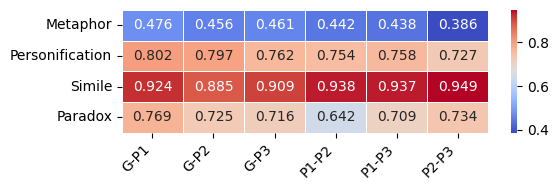

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('Annotation/data.csv', index_col=0)

# Generate the heatmap
plt.figure(figsize=(6, 2))  # Adjust the size as needed
heatmap = sns.heatmap(data, annot=True, fmt=".3f", cmap='coolwarm', linewidths=.5)

# Adjust layout
plt.xticks(rotation=45, ha='right')  # Adjust the rotation and alignment of x-tick labels if needed
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap to a file or show it
plt.savefig('heatmap.png', dpi=300)  # Save the heatmap as an image file
# plt.show()  # Uncomment this line if you want to display the heatmap

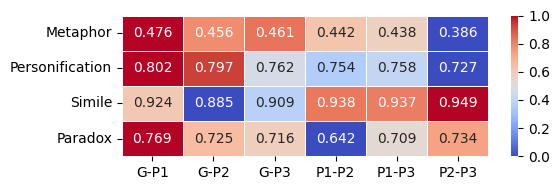

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load the CSV file into a DataFrame
data = pd.read_csv('Annotation/data.csv', index_col=0)

# Normalize each row
normalized_data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Generate the heatmap
plt.figure(figsize=(6, 1.5))  # Adjust the size as needed

# Plot the heatmap using normalized data for coloring, but the original data for annotations
heatmap = sns.heatmap(normalized_data, annot=data, fmt=".3f", cmap='coolwarm', linewidths=.5)

# Adjust layout
plt.xticks(rotation=0)  # Adjust the rotation and alignment of x-tick labels if needed
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap to a file or show it
plt.savefig('heatmap_normalized.png', dpi=300)  # Save the heatmap as an image file
# plt.show()  # Uncomment this line if you want to display the heatmap

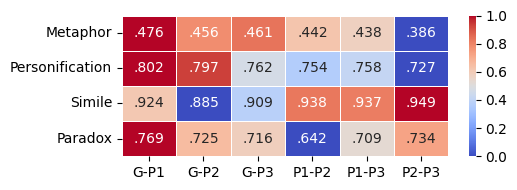

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load the CSV file into a DataFrame
data = pd.read_csv('Annotation/data.csv', index_col=0)

# Normalize each row
normalized_data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Custom annotation format function
def custom_annot_format(val):
    if val == 0:
        return "0"
    elif 0 < val < 1:
        return f".{str(val).split('.')[1]}"
    else:
        return str(int(val))

# Generate the heatmap
plt.figure(figsize=(5.5, 2))  # Adjust the size as needed

# Plot the heatmap using normalized data for coloring, with custom annotations
heatmap = sns.heatmap(
    normalized_data,
    annot=[[custom_annot_format(val) for val in row] for row in data.to_numpy()],
    fmt="s",
    cmap='coolwarm',
    linewidths=.5
)

# Adjust layout
plt.xticks(rotation=0)  # Adjust the rotation and alignment of x-tick labels if needed
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap to a file or show it
plt.savefig('heatmap_normalized.png', dpi=300)  # Save the heatmap as an image file
# plt.show()  # Uncomment this line if you want to display the heatmap